In [1]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Zsófi\\Documents\\CEU\\Winter\\Python-Programming\\Python-Programming-and-Text-Analysis\\Code\\Text-Normalization'

In [7]:
os.chdir("C:\\Users\\Zsófi\\Documents\\CEU\\Winter\\Python-Programming\\Python-Programming-and-Text-Analysis")

Let's apply what we have seen in theory. First of all, we are going to start creating our corpus of four documents which are actually motivational quotes from a google chrome extension which we are going to find in the inputs folder. They are named Motivational1, Motivatioanl2, Motivational3, Motivational4.

In [8]:
os.listdir()

['.git',
 '.gitignore',
 'Code',
 'Example-past-project',
 'in-class',
 'Inputs',
 'Output',
 'README.md',
 'Slides']

In [9]:
os.listdir("Inputs")

['105-extracted-date',
 '106-extracted-date',
 'AmazonShort.csv',
 'articles_bbc_2018_01_30.csv',
 'budapest.txt',
 'droplist.txt',
 'greatest_hits1980.csv',
 'greatest_hits1990.csv',
 'greatest_hits2000.csv',
 'Hello.txt',
 'Mall_Customers.csv',
 'Motivational1.txt',
 'Motivational2.txt',
 'Motivational3.txt',
 'Motivational4.txt',
 'nltk_stopwords.txt',
 'pdfs',
 'sen105kh_fix.csv',
 'smsspamcollection',
 'Social_Network_Ads.csv',
 'spam-reduced']

In [10]:
for element in os.listdir("Inputs"):
    if ".txt" in element:
        print(element)

budapest.txt
droplist.txt
Hello.txt
Motivational1.txt
Motivational2.txt
Motivational3.txt
Motivational4.txt
nltk_stopwords.txt


In [11]:
doc1 = open('Inputs/Motivational1.txt').read()
doc2 = open('Inputs/Motivational2.txt').read()
doc3 = open('Inputs/Motivational3.txt').read()
doc4 = open('Inputs/Motivational4.txt').read()

### Challenge: Write better code to open the documents above. 

In [17]:
# Solution 1 with ChatGPT
from pathlib import Path

docs = [Path(f'Inputs/Motivational{i}.txt').read_text() for i in range(1, 5)]
print(docs[0])

Develop success from failures. Discouragement and failure are two of the surest stepping stones to success


In [20]:
# Solution 2 with ChatGPT
docs = [open(f'Inputs/Motivational{i}.txt').read() for i in range(1, 5)]
print(docs[3])

Start where you are. Use what you have. Do what you can.




In [1]:
import glob

# Define the path pattern to match all files you're interested in
path_pattern = 'Inputs/Motivational*.txt'

# Use glob.glob to find all files matching the pattern
file_paths = glob.glob(path_pattern)

# Initialize a list to hold the contents of each document
documents = []

# Loop through the matched file paths, open, read, and append the content to the list
for file_path in file_paths:
    with open(file_path, 'r') as file:
        documents.append(file.read())

# Now, 'documents' contains the contents of all matched files

NameError: name 'glob' is not defined

In [12]:
doc1

'Develop success from failures. Discouragement and failure are two of the surest stepping stones to success'

In [23]:
doc2

'It is better to fail in originality than to succeed in imitation.\n\n'

In [24]:
list_docs = [doc1, doc2, doc3, doc4]

In [25]:
list_docs

['Develop success from failures. Discouragement and failure are two of the surest stepping stones to success',
 'It is better to fail in originality than to succeed in imitation.\n\n',
 'Learn from yesterday, live for today, hope for tomorrow. The important thing is not to stop questioning.',
 'Start where you are. Use what you have. Do what you can.\n\n']

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
# This counts the occurences in a vector
vectorizer = CountVectorizer()

In [28]:
# The list of the printed documents --> we are fitting and transforming it
doc_vec = vectorizer.fit_transform(list_docs)

In [29]:
# This is a sparse matrix
# 44 elements and 4 docs
# Python stores the matrix in a sparse format
# sparcity comes from the text
# only sparsing it when there are non-zero elements
# we will have to use pandas
doc_vec

<4x44 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [31]:
import pandas as pd
# We are passing it to an array and transposing it helps with readability
# we set the index to get the features names
# feature names are words
# the number of observation goes under the number of documents
df= pd.DataFrame(doc_vec.toarray().transpose(), index = vectorizer.get_feature_names_out())

In [40]:
df

,doc1,doc2,doc3,doc4
and,1,0,0,0
are,1,0,0,1
better,0,1,0,0
can,0,0,0,1
develop,1,0,0,0
discouragement,1,0,0,0
do,0,0,0,1
fail,0,1,0,0
failure,1,0,0,0
failures,1,0,0,0


In [39]:
df.shape

(44, 4)

In [34]:
df.columns = ["doc1", "doc2", "doc3", "doc4"]

In [35]:
df

,doc1,doc2,doc3,doc4
and,1,0,0,0
are,1,0,0,1
better,0,1,0,0
can,0,0,0,1
develop,1,0,0,0
discouragement,1,0,0,0
do,0,0,0,1
fail,0,1,0,0
failure,1,0,0,0
failures,1,0,0,0


In [41]:
#http://www.nltk.org/book/ch01.html
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize

In [53]:
import nltk

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Zsófi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Zsófi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Zsófi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Zsófi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Zsófi\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [56]:
stop_words = stopwords.words('english')

In [57]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Cosine similarity

Cosine similarity is a measure of similarity between two
non-zero vectors of an inner product space. The cosine
similarity is particularly used in positive space, text data,
where the outcome is neatly bounded in [0, 1].
sim(A, B) = cos(Θ) = (A · B)/
                    ||A|| ||B||


### Term Frequency and inverse document frequency

- Improve on Bag of Words by adjusting word counts based on their frequency in corpus (the group of all the documents)
- Use Term Frequency - Inverse Document Frequency (TF-IDF)
- **TF Term- Frequency** is the raw frequency of a word normalized by the number of words in the document
- **IDF Inverse Document Frequency** is the number of documents normalized by the number of documents that contain the term. For terms that are present in every document, this will lead to an IDF value of zero (that is, log(1)). For this reason, one of the possible normalizations for IDF is 1+log(N/DFx).


### All steps together:
- Remove capitalization and punctuation
- Discard word order (Bag of Words)
- Remove stop words
- Applying stemming algorithm
- Create count vector

In [92]:
def preprocessing_text(text):
    # Removing capitalization
    words = word_tokenize(text.lower())
    # Removing punctuation
    tokens = [word for word in words if word not in string.punctuation]
    # Removing stop words
    tokens = [token for token in tokens if token not in  stop_words]
    # Applying stemming algorithm
    stemmer = LancasterStemmer()
    # Creating the count vector
    tokens_lematized = [stemmer.stem(word) for word in tokens]
    # Joining the prepocessed text by joining them
    # what this returns is a big chunk of cleaned text
    preprocessed_text = ' '.join(tokens_lematized)
    return preprocessed_text 

Let's read the file with motivational content. These are short sentences. The purpose is so  that we can see the Tfidf more clearly.

In [48]:
# Creating an empty list
word_list = []
# Joining in each line in the list_docs
for line in list_docs:
    word_list.append(preprocessing_text(line))
word_list

['develop success fail disco fail two surest step ston success',
 'bet fail origin success imit',
 'learn yesterday liv today hop tomorrow import thing stop quest',
 'start us']

In [59]:
# Counts the number of unique words separated by a space
len(set(" ".join(word_list).split()))

23

In [94]:
#vectorizer = TfidfVectorizer(preprocessor=preprocessing_text)
# Instead of CountVectorizer
vectorizer = TfidfVectorizer(preprocessor = preprocessing_text, stop_words = 'english', ngram_range=(1, 2))
# ngram_range=(1,3),stop_words='english'
#ngram_range=(1,3)

In [95]:
vectorizer

TfidfVectorizer(ngram_range=(1, 2),
                preprocessor=<function preprocessing_text at 0x0000019D1EE856C0>,
                stop_words='english')

In [96]:
# We are passing this transformed, cleaned list into fit_transform
doc_vector = vectorizer.fit_transform(word_list)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alway', 'anoth', 'anyon', 'anyth', 'anywh', 'becam', 'becom', 'besid', 'bil', 'cal', 'describ', 'don', 'eith', 'elev', 'els', 'elsewh', 'ev', 'everyon', 'everyth', 'everywh', 'exceiv', 'fil', 'fir', 'fiv', 'form', 'ful', 'giv', 'hent', 'hereaft', 'howev', 'hundr', 'indee', 'int', 'lat', 'mad', 'meanwhil', 'mil', 'min', 'moreov', 'mov', 'nam', 'neith', 'nev', 'nin', 'non', 'noon', 'noth', 'nowh', 'oft', 'oth', 'otherw', 'perhap', 'pleas', 'rath', 'sery', 'sev', 'sid', 'sint', 'someon', 'someth', 'sometim', 'somewh', 'stil', 'tak', 'thent', 'thereaft', 'theref', 'thu', 'togeth', 'twelv', 'wel', 'whatev', 'whenev', 'whent', 'wherea', 'whereaft', 'wherev', 'wheth', 'whith', 'whoev', 'whol', 'whos'] not in stop_words.
  warnings.warn(


In [97]:
doc_vector.shape

(4, 42)

In [98]:
# There are 25 stored elements, half of the original
doc_vector

<4x42 sparse matrix of type '<class 'numpy.float64'>'
	with 44 stored elements in Compressed Sparse Row format>

In [99]:
# We are converting them into an array
# Python will not show this matrix, because it's a sparse matrix --> we can call it
# Transformation is a bit different
# 
doc_vector.toarray()

array([[0.        , 0.        , 0.23588093, 0.23588093, 0.23588093,
        0.23588093, 0.37194247, 0.23588093, 0.        , 0.23588093,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.23588093, 0.23588093,
        0.23588093, 0.23588093, 0.        , 0.        , 0.37194247,
        0.23588093, 0.        , 0.23588093, 0.23588093, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.34829919, 0.34829919, 0.        , 0.        , 0.        ,
        0.        , 0.27460308, 0.        , 0.34829919, 0.        ,
        0.        , 0.        , 0.34829919, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.34829919,
        0.34829919, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.27460308,
        0.     

In [100]:
# We are transposing it to be able to see
# rows are the words
# columns are the documents
# To align with the previous df
doc_vector.toarray().transpose()

array([[0.        , 0.34829919, 0.        , 0.        ],
       [0.        , 0.34829919, 0.        , 0.        ],
       [0.23588093, 0.        , 0.        , 0.        ],
       [0.23588093, 0.        , 0.        , 0.        ],
       [0.23588093, 0.        , 0.        , 0.        ],
       [0.23588093, 0.        , 0.        , 0.        ],
       [0.37194247, 0.27460308, 0.        , 0.        ],
       [0.23588093, 0.        , 0.        , 0.        ],
       [0.        , 0.34829919, 0.        , 0.        ],
       [0.23588093, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.22941573, 0.        ],
       [0.        , 0.        , 0.22941573, 0.        ],
       [0.        , 0.34829919, 0.        , 0.        ],
       [0.        , 0.        , 0.22941573, 0.        ],
       [0.        , 0.        , 0.22941573, 0.        ],
       [0.        , 0.        , 0.22941573, 0.        ],
       [0.        , 0.        , 0.22941573, 0.        ],
       [0.        , 0.        ,

In [101]:
# Getting the feature names as indexes
df = pd.DataFrame(doc_vector.toarray().transpose(), index=vectorizer.get_feature_names_out())

In [102]:
df

,0,1,2,3
bet,0.000000,0.348299,0.000000,0.0
bet fail,0.000000,0.348299,0.000000,0.0
develop,0.235881,0.000000,0.000000,0.0
develop success,0.235881,0.000000,0.000000,0.0
disco,0.235881,0.000000,0.000000,0.0
disco fail,0.235881,0.000000,0.000000,0.0
fail,0.371942,0.274603,0.000000,0.0
fail disco,0.235881,0.000000,0.000000,0.0
fail origin,0.000000,0.348299,0.000000,0.0
fail surest,0.235881,0.000000,0.000000,0.0


In [103]:
df.columns = ['doc1', 'doc2', 'doc3', 'doc4']

In [104]:
df

,doc1,doc2,doc3,doc4
bet,0.000000,0.348299,0.000000,0.0
bet fail,0.000000,0.348299,0.000000,0.0
develop,0.235881,0.000000,0.000000,0.0
develop success,0.235881,0.000000,0.000000,0.0
disco,0.235881,0.000000,0.000000,0.0
disco fail,0.235881,0.000000,0.000000,0.0
fail,0.371942,0.274603,0.000000,0.0
fail disco,0.235881,0.000000,0.000000,0.0
fail origin,0.000000,0.348299,0.000000,0.0
fail surest,0.235881,0.000000,0.000000,0.0


## TfidfVectorizer Parameters:

TfidfVectorizer takes several parameters, but the most commonly used ones include max_features, stop_words, ngram_range, tokenizer, min_df, and max_df.
- max_features: Specifies the maximum number of features (i.e., unique words) to keep.
- stop_words: Specifies a list of stop words to be ignored during vectorization.
- ngram_range: Specifies the range of n-grams to be considered. An n-gram is a contiguous sequence of n items (e.g., words or characters).
- tokenizer: Specifies a custom tokenizer function for tokenizing the input text.
- min_df and max_df: Specify the minimum and maximum document frequency for terms to be included in the vocabulary.

## min_df (minimum document frequency):

- min_df specifies the minimum number of documents (or proportion of documents) in which a term must appear to be included in the vocabulary.
- Terms that appear in fewer documents than the specified threshold will be ignored and not included in the vocabulary.
- This parameter helps filter out rare terms that may not contribute much to the model's predictive power or generalization performance.
- Setting min_df to an integer value specifies the absolute count of documents, while setting it to a float value (e.g., 0.1) specifies the proportion of documents.
- For example, min_df=2 means that a term must appear in at least 2 documents to be included in the vocabulary, while min_df=0.1 means that a term must appear in at least 10% of the documents.
## max_df (maximum document frequency):

- max_df specifies the maximum number of documents (or proportion of documents) in which a term can appear to be included in the vocabulary.
- Terms that appear in more documents than the specified threshold will be ignored and not included in the vocabulary.
- This parameter helps filter out terms that are too frequent and may not provide much discriminatory power in distinguishing between documents.
- Like min_df, max_df can be set to either an integer count or a float proportion value.
- For example, max_df=100 means that a term must appear in at most 100 documents to be included in the vocabulary, while max_df=0.5 means that a term must appear in at most 50% of the documents.

In [105]:
# Now, we are applying the stop words
# If we are removing the stop_words here, it's gonna be the same --> because we removed the stop_words already
# Previously, we ran nltk's stopword lists and now we are using skit learn's
# we can request stop_words from the sk library and it has english
count_model = CountVectorizer(stop_words='english')

In [128]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Get the stop words from NLTK and scikit-learn
nltk_stop_words = set(stopwords.words('english'))
sklearn_stop_words = set(ENGLISH_STOP_WORDS)

print(len(nltk_stop_words))
print(len(sklearn_stop_words))

# Find the differences between the two sets
nltk_unique_stop_words = nltk_stop_words - sklearn_stop_words
sklearn_unique_stop_words = sklearn_stop_words - nltk_stop_words

print("Stop words in NLTK but not in scikit-learn:")
print(nltk_unique_stop_words)

print("\nStop words in scikit-learn but not in NLTK:")
print(sklearn_unique_stop_words)
print(len(nltk_unique_stop_words))

179
318
Stop words in NLTK but not in scikit-learn:
{"shan't", 'wasn', "you've", "haven't", 'isn', "mustn't", "it's", "hadn't", 'don', 'mustn', 'y', 'doing', "didn't", 've', 'theirs', "shouldn't", 'having', 'mightn', 'd', "you'd", "you're", "isn't", 't', 'aren', "aren't", "wouldn't", "don't", "wasn't", "hasn't", 'll', 'weren', 'o', "she's", 'didn', 'haven', "mightn't", 'm', 'just', "you'll", "won't", 'shan', 'needn', "couldn't", 'won', "should've", 'did', "that'll", 'does', 'wouldn', 'doesn', 'shouldn', 'hadn', 'ma', 'couldn', 'hasn', "needn't", 'ain', "weren't", 's', "doesn't"}

Stop words in scikit-learn but not in NLTK:
{'became', 'else', 'empty', 'besides', 'often', 'thru', 'noone', 'another', 'name', 'therefore', 'nevertheless', 'beside', 'describe', 'anywhere', 'detail', 'otherwise', 'eleven', 'might', 'hereafter', 'hence', 'everywhere', 'herein', 'thin', 'whole', 'nowhere', 'among', 'mine', 'nothing', 'always', 'elsewhere', 'alone', 'eg', 'beforehand', 'may', 'many', 'although',

In [143]:
print(f"Nltk contains {len(nltk_stop_words)} stop words.")
print(f"Scikit learn contains {len(sklearn_stop_words)} stop words.")

Nltk contains 179 stop words.
Scikit learn contains 318 stop words.


In [106]:
count_model

CountVectorizer(stop_words='english')

In [136]:
# docs_unigram likely represents a sparse matrix, possibly obtained from a text vectorization 
docs_unigram = count_model.fit_transform(word_list)

In [116]:
docs_unigram

<4x21 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [144]:
# covariance matrix: we can see the correlation between the words
docs_unigram.todense()
# converts the sparse matrix docs_unigram into a dense matrix.
# A dense matrix is a standard matrix representation, where
# .. all elements are stored explicitly, regardless of whether they are zero or nonzero.

matrix([[0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int64)

In [118]:
# Matrix multiplication
# multiplying corresponding elements of rows and columns and summing the results to produce the elements of the resulting matrix 
docs_unigram_matrix = (docs_unigram.T * docs_unigram)

In [119]:
# .setdiag() method is used to set the diagonal elements of the matrix to a specified value.
# In this case, the value specified is 0.
# By setting the diagonal elements to 0,
# ... the code is essentially removing any self-similarity or self-correlation of the documents with themselves
docs_unigram_matrix.setdiag(0)

In [120]:
#docs_unigram_matrix.todense()

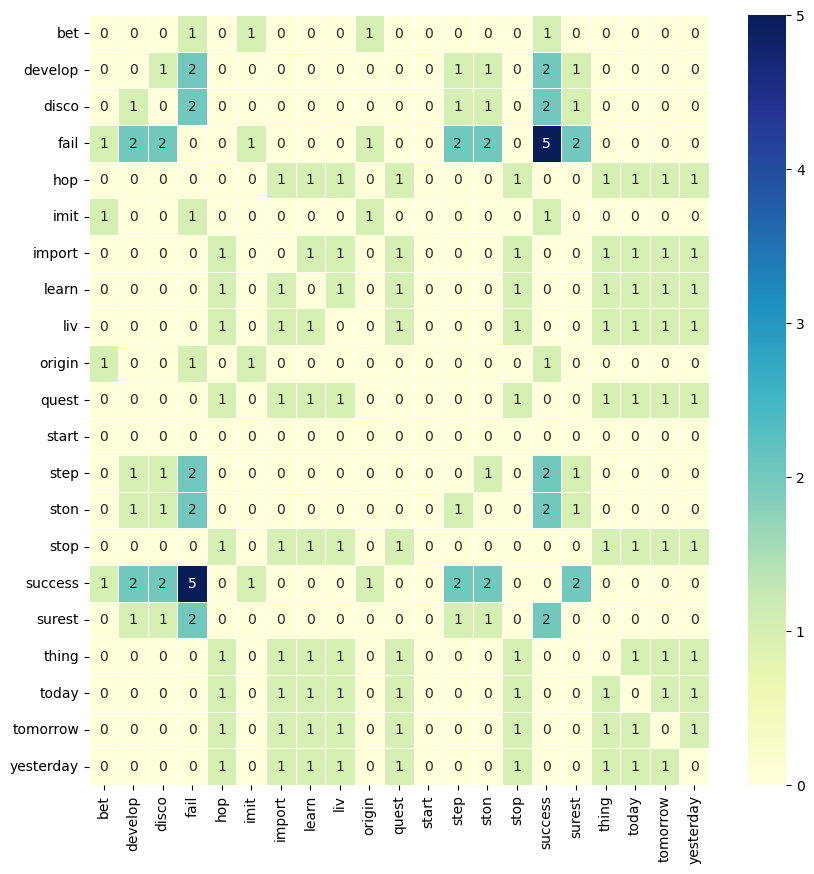

In [123]:
import seaborn as sns
df = pd.DataFrame(docs_unigram_matrix.todense(), index = count_model.get_feature_names_out())
df.columns = count_model.get_feature_names_out()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df, annot=True,linewidths=.5, cmap="YlGnBu" )

### References
https://en.wikipedia.org/wiki/Sparse_matrix

https://machinelearningmastery.com/sparse-matrices-for-machine-learning/

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

https://en.wikipedia.org/wiki/N-gram

https://scikit-learn.org/stable/